In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.spatial.distance

num_points = 1000
k = 5

In [2]:
def plot_points(X):
    plt.plot(X[:, 0], X[:, 1], 'ro')
    plt.grid()
    plt.show()

In [3]:
def generate_gmm(n, k, d=2):
    X = []
    for _ in range(k):
        mu = np.random.uniform(-15, 15, d)
        C = np.random.uniform(-1, 2, (d, d)) + np.random.uniform(1, 2)*np.identity(d)
        Z = np.dot(np.random.randn(n//k, 2), C) + mu
        X.append(Z)
    X = np.vstack(X)
    return X

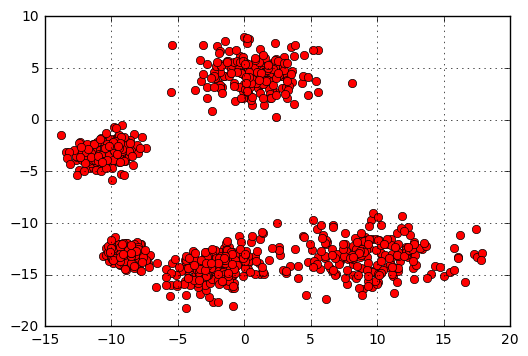

In [4]:
np.random.seed(2)
X = generate_gmm(num_points, k)
plot_points(X)

In [5]:
def my_kmeans(X, k):
    num_iter = 10
    centroids = X[random.sample(range(len(X)), k)]
    centroids_old = []
    while not np.array_equal(centroids, centroids_old) and num_iter > 0:
        dist = scipy.spatial.distance.cdist(X, centroids)
        idx = np.argmin(dist, axis=1)
        plt.scatter(X[:, 0], X[:, 1], c = idx)
        plt.scatter(centroids[:, 0], centroids[:, 1], c = range(k), s=100)
        plt.grid()
        plt.show()
        centroids_old = np.copy(centroids)
        for i in range(k):
            centroids[i, :] = np.mean(X[idx == i, :], axis=0)
        num_iter -= 1
        
    return centroids

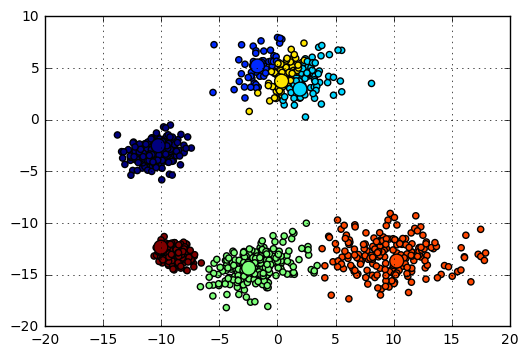

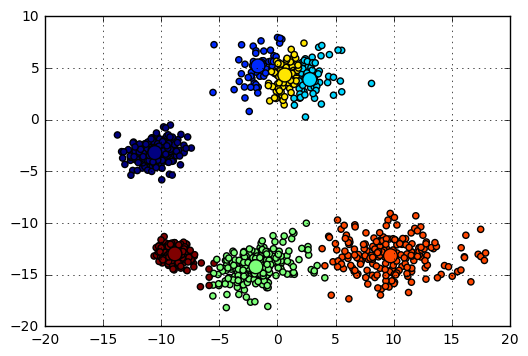

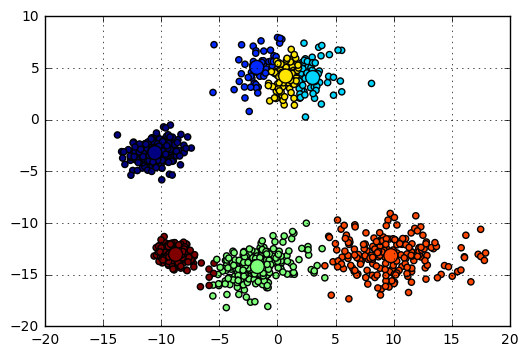

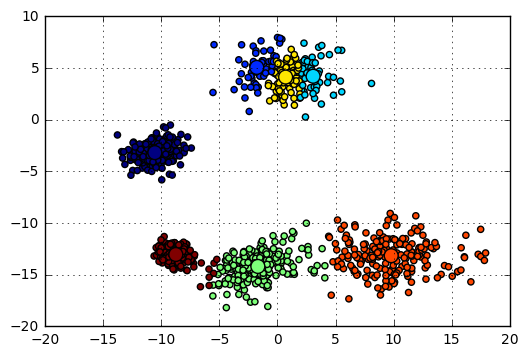

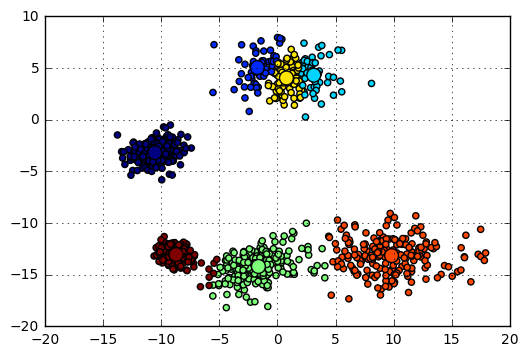

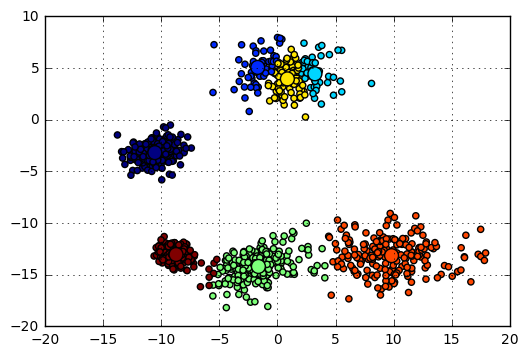

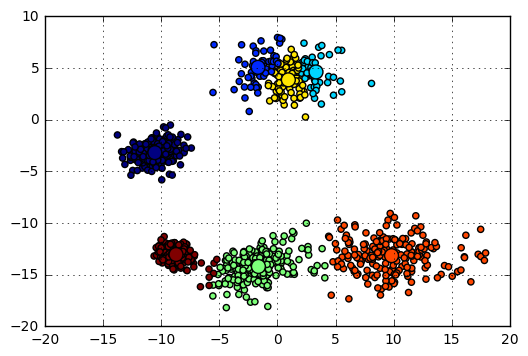

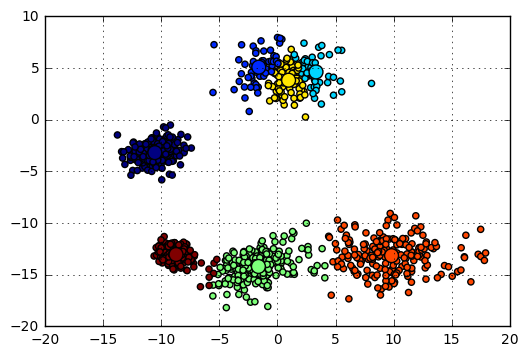

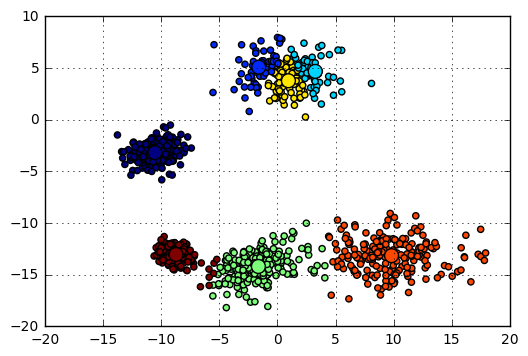

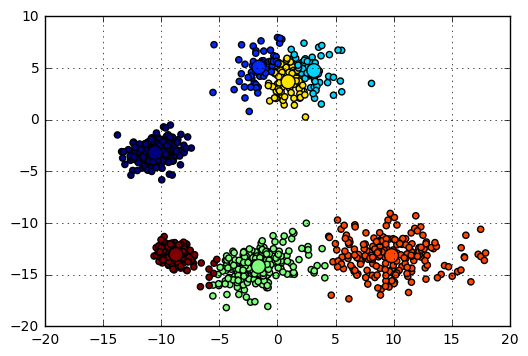

In [6]:
clusters = my_kmeans(X, k=7)